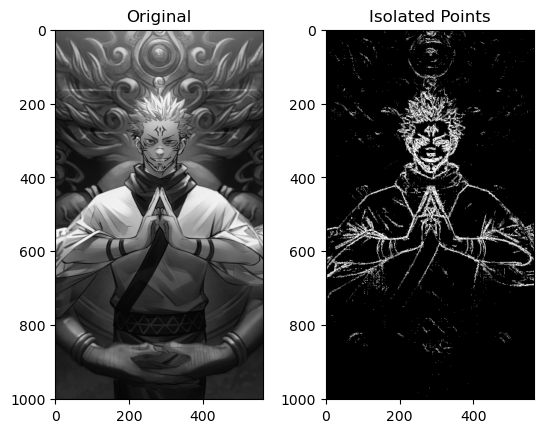

In [ ]:
#Detect Isolated Points Using Point Operations (Gray Level Transformation)
#Isolated points in an image can be detected using a Laplacian filter, which highlights intensity changes.
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_isolated_points(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    _, thresholded = cv2.threshold(np.abs(laplacian), 30, 255, cv2.THRESH_BINARY)
    return thresholded.astype(np.uint8)

image = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)
isolated_points = detect_isolated_points(image)

plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Isolated Points')
plt.imshow(isolated_points, cmap='gray')

plt.show()


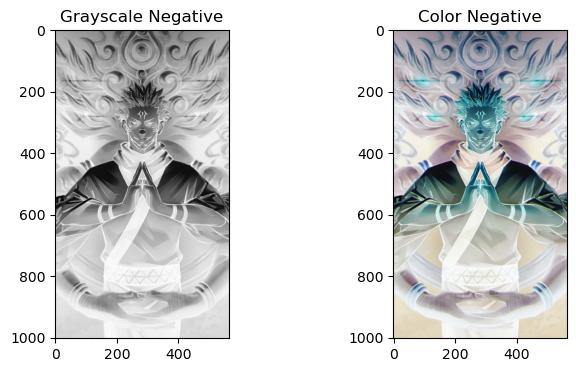

In [3]:
#Image Negative for Grayscale, Color, and Binary Images
#The image negative is obtained by subtracting pixel values from the maximum intensity.
def negative_image(image):
    return 255 - image

image_gray = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)
image_color = cv2.imread('sukuna.jpg')

negative_gray = negative_image(image_gray)
negative_color = negative_image(image_color)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Grayscale Negative')
plt.imshow(negative_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Color Negative')
plt.imshow(cv2.cvtColor(negative_color, cv2.COLOR_BGR2RGB))

plt.show()



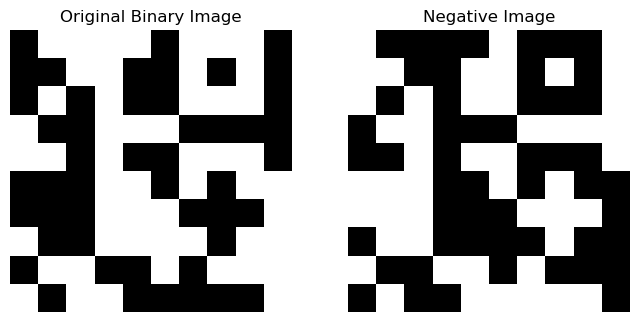

In [12]:
# Generate a random binary image (0s and 1s)
binary_image = np.random.choice([0, 1], size=(10, 10))

# Compute the negative of the binary image
negative_image = 1 - binary_image

# Plot the original and negative images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(binary_image, cmap='gray', vmin=0, vmax=1)
axes[0].set_title("Original Binary Image")
axes[0].axis("off")

axes[1].imshow(negative_image, cmap='gray', vmin=0, vmax=1)
axes[1].set_title("Negative Image")
axes[1].axis("off")

plt.show()

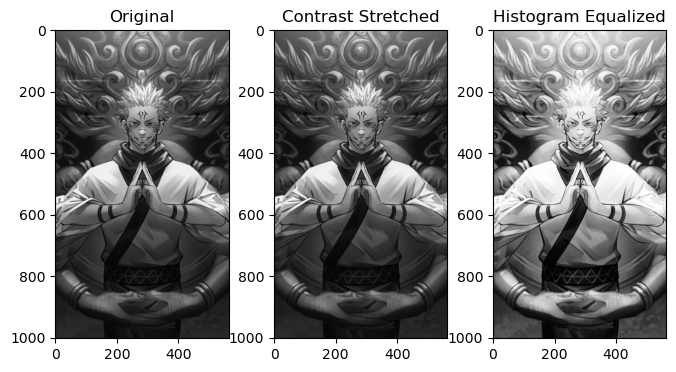

In [6]:
# Contrast Stretching vs. Histogram Equalization
# Contrast stretching enhances visibility by stretching pixel intensities to cover the entire dynamic range.
def contrast_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    stretched = ((image - min_val) / (max_val - min_val)) * 255
    return stretched.astype(np.uint8)

image_gray = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)
contrast_stretched = contrast_stretching(image_gray)
equalized = cv2.equalizeHist(image_gray)

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Contrast Stretched')
plt.imshow(contrast_stretched, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Histogram Equalized')
plt.imshow(equalized, cmap='gray')

plt.show()


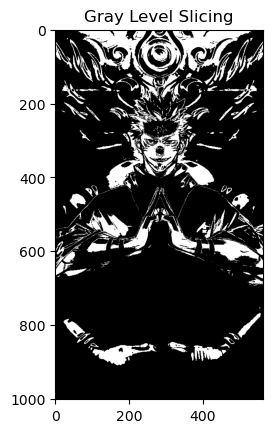

In [7]:
#Gray Level Slicing
# Used to highlight a specific range of intensities.
def gray_level_slicing(image, min_range, max_range):
    mask = (image >= min_range) & (image <= max_range)
    result = np.zeros_like(image)
    result[mask] = 255
    return result

sliced = gray_level_slicing(image_gray, 100, 150)

plt.imshow(sliced, cmap='gray')
plt.title('Gray Level Slicing')
plt.show()


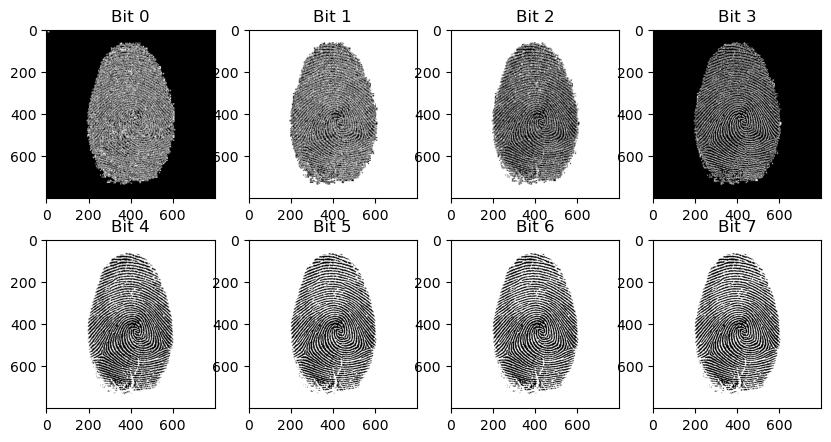

In [10]:
# Bit-Plane Slicing for Fingerprint Image
# Bit-plane slicing extracts specific bit layers from the image
def bit_plane_slicing(image, bit_position):
    return ((image >> bit_position) & 1) * 255

image_gray = cv2.imread('fingerprint.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_plane_slicing(image_gray, i), cmap='gray')
    plt.title(f'Bit {i}')

plt.show()


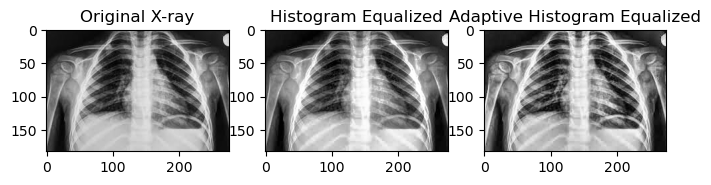

In [11]:
#Histogram Equalization and Adaptive Histogram Equalization
#Improves contrast in an X-ray image.
def apply_histogram_equalization(image):
    return cv2.equalizeHist(image)

def apply_adaptive_histogram_equalization(image):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe.apply(image)

xray_image = cv2.imread('xray.jpg', cv2.IMREAD_GRAYSCALE)

equalized = apply_histogram_equalization(xray_image)
adaptive_equalized = apply_adaptive_histogram_equalization(xray_image)

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.title('Original X-ray')
plt.imshow(xray_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Histogram Equalized')
plt.imshow(equalized, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Adaptive Histogram Equalized')
plt.imshow(adaptive_equalized, cmap='gray')

plt.show()
